## ข้อ 1

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

df = pd.read_csv('../../DATASET + XLSX/iris.csv')
df

,id,label,sepal.length,sepal.width,petal.length,petal.width
0,1,0,5.1,3.5,1.4,0.2
1,2,0,4.9,3.0,NaN,0.2
2,3,0,4.7,3.2,1.3,0.2
3,4,0,4.6,3.1,1.5,0.2
4,5,0,5.0,3.6,1.4,0.2
...,...,...,...,...,...,...
145,146,2,6.7,3.0,5.2,2.3
146,147,2,6.3,2.5,5.0,1.9
147,148,2,6.5,NaN,5.2,2.0
148,149,2,6.2,3.4,5.4,2.3


In [3]:
from sklearn.datasets import load_iris

data = load_iris()
X, y = data.data, data.target

## ข้อ 2

In [4]:
print("Features:")
for i, feature in enumerate(data.feature_names):
    print(f"   {i}: {feature}")

print("\nLabels:")
for i, target in enumerate(data.target_names):
    print(f"   {i} = {target}")

Features:
   0: sepal length (cm)
   1: sepal width (cm)
   2: petal length (cm)
   3: petal width (cm)

Labels:
   0 = setosa
   1 = versicolor
   2 = virginica


## ข้อ 3

In [5]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
y_onehot = encoder.fit_transform(y.reshape(-1, 1)).toarray()

for i, (label, code) in enumerate(zip(data.target_names, y_onehot[:3])):
    print(f"{label:<12} {code}")

setosa       [1. 0. 0.]
versicolor   [1. 0. 0.]
virginica    [1. 0. 0.]


## ข้อ 4

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(f"Train set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

Train set: 112 samples
Test set: 38 samples


## ข้อ 5

In [7]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

mlp = MLPClassifier(
    hidden_layer_sizes=(50,),
    learning_rate_init=0.005,
    solver='sgd',
    activation='logistic',
    max_iter=1000,
    random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlp.fit(X_train_scaled, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(50,),
              learning_rate_init=0.005, max_iter=1000, random_state=42,
              solver='sgd')

## ข้อ 6

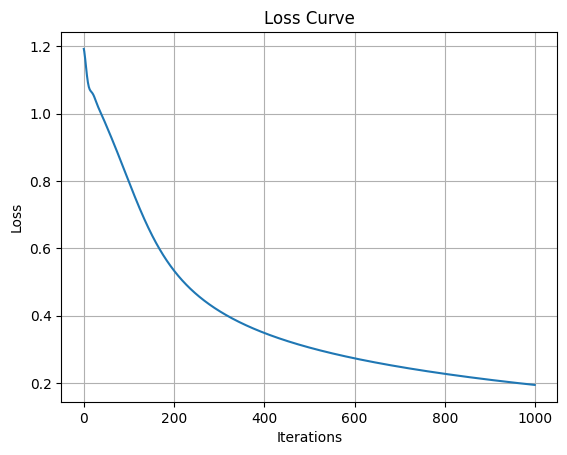

In [8]:
import matplotlib.pyplot as plt

plt.plot(mlp.loss_curve_)
plt.title('Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid()
plt.show()

## ข้อ 7

In [9]:
from sklearn.metrics import accuracy_score

y_pred = mlp.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


## ข้อ 8

In [10]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [(5,), (20,), (5, 5), (5, 20), (5, 20, 5)],
    'activation': ['logistic', 'relu'],
    'solver': ['sgd', 'adam'],
    'learning_rate_init': [0.0001, 0.001, 0.005]
}

mlp_grid = MLPClassifier(max_iter=1000, random_state=42)
grid_search = GridSearchCV(mlp_grid, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

print("Best parameters from CV:")
for param, value in grid_search.best_params_.items():
    print(f"   {param}: {value}")
print(f"Best CV score: {grid_search.best_score_:.2f}")

Best parameters from CV:
   activation: logistic
   hidden_layer_sizes: (5, 20)
   learning_rate_init: 0.001
   solver: adam
Best CV score: 0.96


## ข้อ 9

In [11]:
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)
best_accuracy = accuracy_score(y_test, y_pred_best)
print(f"Best model accuracy: {best_accuracy * 100:.2f}%")

Best model accuracy: 97.37%


## ข้อ 10

In [12]:
best_hidden_sizes = grid_search.best_params_['hidden_layer_sizes']
n_features = X_train.shape[1] 
n_classes = len(data.target_names)  

if len(best_hidden_sizes) == 1:
    params_input_hidden = n_features * best_hidden_sizes[0] + best_hidden_sizes[0]  
    params_hidden_output = best_hidden_sizes[0] * n_classes + n_classes  
else:
    params_input_hidden = n_features * best_hidden_sizes[0] + best_hidden_sizes[0]
    params_hidden_output = best_hidden_sizes[-1] * n_classes + n_classes

In [13]:
print(f"Parameters between input and hidden layer: {params_input_hidden}")

Parameters between input and hidden layer: 25


## ข้อ 11

In [14]:
print(f"Parameters between hidden and output layer: {params_hidden_output}")

Parameters between hidden and output layer: 63


## ข้อ 12

In [15]:
df = pd.read_csv('../../DATASET + XLSX/bike_rental.csv')

df.head(12)

,instant,date,season,temp,humi,windspeed,casual,registered
0,1,1/1/2011,1,34.417,8.058,1.604,331,654
1,2,2/1/2011,1,36.348,6.961,2.485,131,670
2,3,3/1/2011,1,19.636,4.373,2.483,120,1229
3,4,4/1/2011,1,20.000,5.904,1.603,108,1454
4,5,5/1/2011,1,22.696,4.370,1.869,82,1518
5,6,6/1/2011,1,20.435,5.183,0.896,88,1518
6,7,7/1/2011,1,19.652,4.987,1.687,148,1362
7,8,8/1/2011,1,16.500,5.358,2.668,68,891
8,9,9/1/2011,1,13.833,4.342,3.620,54,768
9,10,10/1/2011,1,15.083,4.829,2.233,41,1280


## ข้อ 13

In [16]:
df["date"] = pd.to_datetime(df["date"], format="%d/%m/%Y")

df["weekday"] = df["date"].dt.weekday

df["working_day"] = df["weekday"].apply(lambda x: 0 if x >= 5 else 1)

df["month"] = df["date"].dt.month - 1

df["lag_feature_1"] = df["casual"].shift(1) + df["registered"].shift(1)
df["lag_feature_2"] = df["casual"].shift(2) + df["registered"].shift(3)
df["lag_feature_3"] = df["casual"].shift(3) + df["registered"].shift(3)

df

,instant,date,season,temp,humi,windspeed,casual,registered,weekday,working_day,month,lag_feature_1,lag_feature_2,lag_feature_3
0,1,2011-01-01,1,34.417,8.058,1.604,331,654,5,0,0,NaN,NaN,NaN
1,2,2011-01-02,1,36.348,6.961,2.485,131,670,6,0,0,985.0,NaN,NaN
2,3,2011-01-03,1,19.636,4.373,2.483,120,1229,0,1,0,801.0,NaN,NaN
3,4,2011-01-04,1,20.000,5.904,1.603,108,1454,1,1,0,1349.0,785.0,985.0
4,5,2011-01-05,1,22.696,4.370,1.869,82,1518,2,1,0,1562.0,790.0,801.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,25.417,6.529,3.501,247,1867,3,1,11,441.0,1186.0,920.0
727,728,2012-12-28,1,25.333,5.900,1.555,644,2451,4,1,11,2114.0,582.0,1013.0
728,729,2012-12-29,1,25.333,7.529,1.244,159,1182,5,0,11,3095.0,679.0,441.0
729,730,2012-12-30,1,25.583,4.833,3.508,364,1432,6,0,11,1341.0,2511.0,2114.0


## ข้อ 14

In [17]:
df["cnt"] = df["casual"].shift(-1) + df["registered"].shift(-1)

df

,instant,date,season,temp,humi,windspeed,casual,registered,weekday,working_day,month,lag_feature_1,lag_feature_2,lag_feature_3,cnt
0,1,2011-01-01,1,34.417,8.058,1.604,331,654,5,0,0,NaN,NaN,NaN,801.0
1,2,2011-01-02,1,36.348,6.961,2.485,131,670,6,0,0,985.0,NaN,NaN,1349.0
2,3,2011-01-03,1,19.636,4.373,2.483,120,1229,0,1,0,801.0,NaN,NaN,1562.0
3,4,2011-01-04,1,20.000,5.904,1.603,108,1454,1,1,0,1349.0,785.0,985.0,1600.0
4,5,2011-01-05,1,22.696,4.370,1.869,82,1518,2,1,0,1562.0,790.0,801.0,1606.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,25.417,6.529,3.501,247,1867,3,1,11,441.0,1186.0,920.0,3095.0
727,728,2012-12-28,1,25.333,5.900,1.555,644,2451,4,1,11,2114.0,582.0,1013.0,1341.0
728,729,2012-12-29,1,25.333,7.529,1.244,159,1182,5,0,11,3095.0,679.0,441.0,1796.0
729,730,2012-12-30,1,25.583,4.833,3.508,364,1432,6,0,11,1341.0,2511.0,2114.0,2729.0


## ข้อ 15

In [18]:
start_date = df["date"].min()
train_end_date = start_date + pd.DateOffset(months=18)

train_df = df[df["date"] < train_end_date].dropna()
test_df = df[df["date"] >= train_end_date].dropna()

X_train = train_df[["temp", "humi", "windspeed", "weekday", "working_day", "month",
                    "lag_feature_1", "lag_feature_2", "lag_feature_3"]]
y_train = train_df["cnt"]

X_test = test_df[["temp", "humi", "windspeed", "weekday", "working_day", "month",
                  "lag_feature_1", "lag_feature_2", "lag_feature_3"]]
y_test = test_df["cnt"]

print("Train size:", X_train.shape, "Test size:", X_test.shape)

Train size: (544, 9) Test size: (183, 9)


## ข้อ 16

In [19]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    "hidden_layer_sizes": [(50,), (10,10), (10,50), (10,50,5)],
    "activation": ["logistic", "identity", "relu"],
    "solver": ["sgd", "adam"],
    "learning_rate_init": [0.0001, 0.001, 0.005],
    "n_iter_no_change": [10, 50]
}

mlp = MLPRegressor(max_iter=2000, random_state=42)
grid = GridSearchCV(mlp, param_grid, cv=5, scoring="r2", n_jobs=-1, verbose=2)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best CV R2:", grid.best_score_)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best parameters: {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.0001, 'n_iter_no_change': 50, 'solver': 'adam'}
Best CV R2: -0.10360937468331954


## ข้อ 17

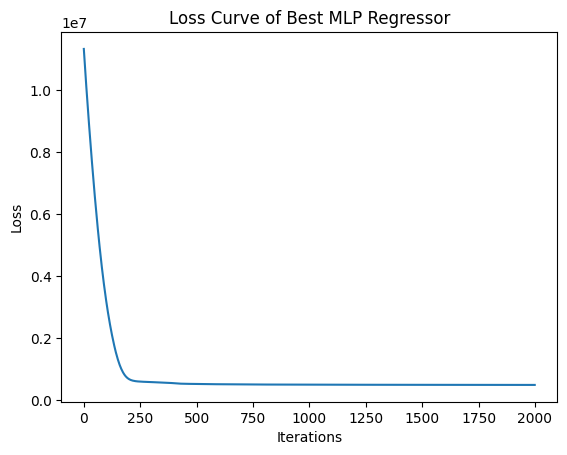

In [20]:
best_model = grid.best_estimator_

plt.plot(best_model.loss_curve_)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss Curve of Best MLP Regressor")
plt.show()

## ข้อ 18

In [21]:
from sklearn.metrics import r2_score

y_pred_mlp = best_model.predict(X_test)
r2_mlp = r2_score(y_test, y_pred_mlp)
print("MLP Regressor R2 on test set:", r2_mlp)

MLP Regressor R2 on test set: 0.37441144760653244


## ข้อ 19

In [22]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression R2:", r2_lr)

if r2_mlp > r2_lr:
    print("MLP is Better.")
else:
    print("Linear Regression is Better.")

Linear Regression R2: 0.3729952591131471
MLP is Better.
